In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_county = pd.read_csv('County_Zhvi_AllHomes.csv',encoding='latin-1')
df_zipcode = pd.read_csv('Zip_Zhvi_AllHomes.csv',encoding='latin-1')

In [3]:
df_county = df_county[df_county.State =='IN']
df_zipcode = df_zipcode[df_zipcode.State =='IN']

In [4]:
df_county.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
54,1165,Marion County,IN,Indianapolis-Carmel-Anderson,18,97,55,NaN,NaN,NaN,...,143487,143814,144147,144491,145655,146936,148115,148663,149503,151010
130,221,Lake County,IN,Chicago-Naperville-Elgin,18,89,131,NaN,NaN,NaN,...,153958,154751,155672,156600,157517,158590,159567,160530,161321,162255
181,367,Allen County,IN,Fort Wayne,18,3,182,NaN,NaN,NaN,...,143118,143855,144470,145234,146110,147064,147891,148720,149677,150845
234,2318,Hamilton County,IN,Indianapolis-Carmel-Anderson,18,57,235,NaN,NaN,NaN,...,285382,285833,286661,287659,288708,289518,290281,291492,292851,294430
244,2849,Saint Joseph County,IN,South Bend-Mishawaka,18,141,245,NaN,NaN,NaN,...,129993,130867,131349,131888,132293,132972,133437,133882,133814,134133


In [5]:
df_zipcode.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
173,78823,47906,West Lafayette,IN,Lafayette-West Lafayette,Tippecanoe County,174,NaN,NaN,NaN,...,223048,224264,224772,225786,227316,229164,230635,231927,233334,235047
185,78085,46307,Crown Point,IN,Chicago-Naperville-Elgin,Lake County,186,NaN,NaN,NaN,...,234992,235984,237332,238586,239685,240750,241646,242665,243528,244670
242,78042,46227,Indianapolis,IN,Indianapolis-Carmel-Anderson,Marion County,243,NaN,NaN,NaN,...,149714,150001,150358,150708,152158,153644,154971,155486,156278,157842
394,77986,46143,Greenwood,IN,Indianapolis-Carmel-Anderson,Johnson County,395,NaN,NaN,NaN,...,204271,204623,205365,206028,207361,208763,209879,210516,211173,212490
561,78467,47150,New Albany,IN,Louisville/Jefferson County,Floyd County,562,NaN,NaN,NaN,...,147593,148714,149583,150842,151959,152694,153069,153481,153783,154140


In [6]:
df_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 173 to 30449
Columns: 294 entries, RegionID to 2020-02
dtypes: float64(261), int64(29), object(4)
memory usage: 1.8+ MB


In [7]:
def get_datetimes(df):
    """
        change the column data type from str to datetime 
        input: DataFrame with column names with time and others
        return: the datetime index
    """
    border = list(df.columns).index('SizeRank')+1#find the first time column
    return pd.to_datetime(df.columns.values[border:], format='%Y-%m')

In [8]:
time = get_datetimes(df_zipcode)

In [9]:
time[-26:]

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', freq=None)

Let us see the trend from 2018.

In [10]:
df_zipcode_recent = pd.DataFrame()
df_zipcode_recent['RegionName']= df_zipcode.RegionName
df_zipcode_recent['CountyName']= df_zipcode.CountyName
df_zipcode_recent[time[-26:]] = df_zipcode[df_zipcode.columns[-26:]]

In [11]:
df_zipcode_available = pd.DataFrame()
df_zipcode_available['RegionName']= df_zipcode.RegionName
df_zipcode_available['CountyName']= df_zipcode.CountyName
border = list(df_zipcode.columns).index('SizeRank')+1
df_zipcode_available[time] = df_zipcode[df_zipcode.columns[border:]]

In [12]:
zipcode_county = df_zipcode_recent[df_zipcode_recent.columns[:2]]
zipcode_county

,RegionName,CountyName
173,47906,Tippecanoe County
185,46307,Lake County
242,46227,Marion County
394,46143,Johnson County
561,47150,Floyd County
...,...,...
30397,47683,Gibson County
30440,47556,Dubois County
30443,47986,Benton County
30448,46942,Cass County


In [13]:
df_zipcode_price2018 = df_zipcode_recent[df_zipcode_recent.columns[2:]].T
df_zipcode_price2018.head()
df_zipcode_price2018.columns = zipcode_county.RegionName

In [14]:
df_zipcode_price2018.head()

RegionName,47906,46307,46227,46143,47150,47130,46032,47401,46360,47374,...,47457,46921,46170,46047,46912,47683,47556,47986,46942,47107
2018-01-01 00:00:00,212172,217546,134629,189424,135475,134648,325769,245728,118066,90187,...,60529,56115,83604,71805,68600,40974,134892,55785,68026,69853
2018-02-01 00:00:00,213674,218473,135088,189677,136586,136867,327904,247111,118762,90201,...,61801,55423,84133,70489,69662,40795,136144,56145,67780,68686
2018-03-01 00:00:00,214966,219374,136299,190297,137566,139136,329751,248162,119211,90121,...,63078,55272,84809,69911,71043,40324,136670,56462,67695,67590
2018-04-01 00:00:00,215693,220697,138015,191324,137936,140333,331775,249268,119985,90049,...,63787,55178,85711,70098,72335,40224,136798,57246,67924,67351
2018-05-01 00:00:00,215968,222033,139239,192728,138156,141230,332551,250401,120510,90203,...,63865,55678,86330,70177,73359,40391,137089,57276,68670,67533


In [15]:
df_zipcode_price = df_zipcode_available[df_zipcode_available.columns[2:]].T
df_zipcode_price.head()
df_zipcode_price.columns = zipcode_county.RegionName

In [16]:
zipcode_county.query('CountyName == "Marion County"')

,RegionName,CountyName
242,46227,Marion County
1156,46226,Marion County
1358,46220,Marion County
1399,46237,Marion County
1507,46254,Marion County
1924,46219,Marion County
1966,46224,Marion County
2011,46203,Marion County
2168,46260,Marion County
2637,46222,Marion County


In [17]:
df_zipcode_price[46227].isna().sum()

40

In [18]:
df_zipcode_price[46227][40:]

1999-08-01     81013.0
1999-09-01     81574.0
1999-10-01     81556.0
1999-11-01     81807.0
1999-12-01     82103.0
                ...   
2019-10-01    153644.0
2019-11-01    154971.0
2019-12-01    155486.0
2020-01-01    156278.0
2020-02-01    157842.0
Name: 46227, Length: 247, dtype: float64

In [19]:
zipcode_county.query('RegionName == 46227')

,RegionName,CountyName
242,46227,Marion County


In [20]:
pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]# +', '+ str(47906)

'Marion County'

Text(0.5, 1.0, 'Marion County, 46227, housing price trend')

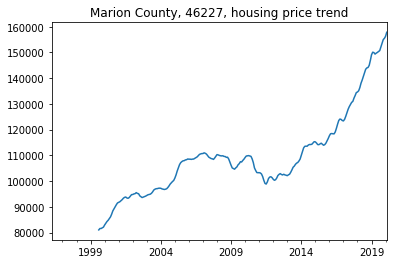

In [21]:
df_zipcode_price[46227].plot()
county = pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]

plt.title(county +', '+ str(46227) + ', housing price trend')

In [22]:
df_county_available = pd.DataFrame()
df_county_available['RegionName']= df_county.RegionName
# df_county_available['CountyName']= df_county.CountyName
border = list(df_county.columns).index('SizeRank')+1
df_county_available[time] = df_county[df_county.columns[border:]]

In [23]:
df_county_available.set_index('RegionName', inplace = True)

In [24]:
df_county_available.loc['Marion County'].isna().sum()

40

In [25]:
df_county_available.loc['Marion County']

1996-04-01         NaN
1996-05-01         NaN
1996-06-01         NaN
1996-07-01         NaN
1996-08-01         NaN
                ...   
2019-10-01    146936.0
2019-11-01    148115.0
2019-12-01    148663.0
2020-01-01    149503.0
2020-02-01    151010.0
Name: Marion County, Length: 287, dtype: float64

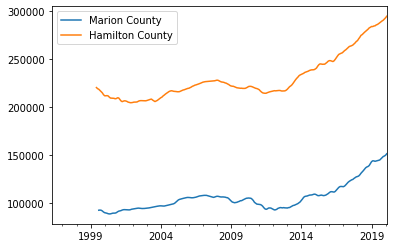

In [26]:
df_county_available.loc['Marion County'].plot()
df_county_available.loc['Hamilton County'].plot()
plt.legend()
# county = pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]

# plt.title(county +', '+ str(46227) + ', housing price trend')

### Statewide housing price analysis

In [27]:
df_state = pd.read_csv('State_Zhvi_AllHomes.csv',encoding='latin-1')

In [28]:
df_state.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,9,California,1,160300.0,160105.0,159952.0,159858.0,159843.0,159869.0,160020.0,...,549807,550441,551379,552857,554941,557171,559486,562746,566545,571875
1,54,Texas,2,97811.0,97947.0,98064.0,98152.0,98273.0,98427.0,98607.0,...,205930,206523,207188,207806,208470,208922,209364,209661,210018,210343
2,43,New York,3,137843.0,137740.0,137675.0,137595.0,137514.0,137477.0,137495.0,...,321730,322337,322860,323326,323741,324222,324792,325532,326269,327032
3,14,Florida,4,100571.0,100771.0,101000.0,101219.0,101417.0,101546.0,101680.0,...,243111,243639,244282,244909,245558,246280,247046,247775,248722,249943
4,21,Illinois,5,138529.0,138017.0,137714.0,137289.0,137754.0,138460.0,139920.0,...,203519,203759,204061,204274,204368,204403,204423,204528,204716,204872


In [29]:
def get_datetimes(df):
    """
        change the column data type from str to datetime 
        input: DataFrame with column names with time and others
        return: the datetime index
    """
    border = list(df.columns).index('SizeRank')+1#find the first time column
    return pd.to_datetime(df.columns.values[border:], format='%Y-%m')

In [30]:
time = get_datetimes(df_state)

In [31]:
time[-26:]

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', freq=None)

Let us see the trend from 2018.

In [32]:
df_state_available = pd.DataFrame()
df_state_available['RegionName']= df_state.RegionName

border = list(df_state.columns).index('SizeRank')+1
df_state_available[time] = df_state[df_state.columns[border:]]

In [33]:
df_state_available.head()

,RegionName,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
0,California,160300.0,160105.0,159952.0,159858.0,159843.0,159869.0,160020.0,160197.0,160453.0,...,549807,550441,551379,552857,554941,557171,559486,562746,566545,571875
1,Texas,97811.0,97947.0,98064.0,98152.0,98273.0,98427.0,98607.0,98823.0,99062.0,...,205930,206523,207188,207806,208470,208922,209364,209661,210018,210343
2,New York,137843.0,137740.0,137675.0,137595.0,137514.0,137477.0,137495.0,137552.0,137656.0,...,321730,322337,322860,323326,323741,324222,324792,325532,326269,327032
3,Florida,100571.0,100771.0,101000.0,101219.0,101417.0,101546.0,101680.0,101832.0,102021.0,...,243111,243639,244282,244909,245558,246280,247046,247775,248722,249943
4,Illinois,138529.0,138017.0,137714.0,137289.0,137754.0,138460.0,139920.0,141112.0,142019.0,...,203519,203759,204061,204274,204368,204403,204423,204528,204716,204872


In [34]:
df_state_price = df_state_available[df_state_available.columns[2:]].T
df_state_price.head()
# df_state_price.columns = df_state_available.RegionName

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
1996-05-01 00:00:00,160105.0,97947.0,137740.0,100771.0,138017.0,95391.0,92632.0,92100.0,103303.0,110595.0,...,105341.0,125036.0,NaN,131198.0,84398.0,126501.0,NaN,108101.0,162993.0,NaN
1996-06-01 00:00:00,159952.0,98064.0,137675.0,101000.0,137714.0,95345.0,92923.0,92768.0,103675.0,111035.0,...,105515.0,124770.0,NaN,131464.0,84419.0,127108.0,NaN,107825.0,162354.0,NaN
1996-07-01 00:00:00,159858.0,98152.0,137595.0,101219.0,137289.0,95311.0,93179.0,93372.0,104022.0,111504.0,...,105818.0,124529.0,NaN,131922.0,84450.0,127656.0,NaN,107511.0,161804.0,NaN
1996-08-01 00:00:00,159843.0,98273.0,137514.0,101417.0,137754.0,95349.0,93467.0,93933.0,104370.0,111962.0,...,106069.0,124458.0,NaN,132294.0,84473.0,128094.0,NaN,107270.0,161348.0,NaN
1996-09-01 00:00:00,159869.0,98427.0,137477.0,101546.0,138460.0,95376.0,93764.0,94449.0,104712.0,112364.0,...,106290.0,124639.0,NaN,132762.0,84529.0,128450.0,NaN,107163.0,161048.0,NaN


In [35]:
df_state_price.columns = df_state.RegionName

In [36]:
df_state_price.head()

RegionName,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-05-01 00:00:00,160105.0,97947.0,137740.0,100771.0,138017.0,95391.0,92632.0,92100.0,103303.0,110595.0,...,105341.0,125036.0,NaN,131198.0,84398.0,126501.0,NaN,108101.0,162993.0,NaN
1996-06-01 00:00:00,159952.0,98064.0,137675.0,101000.0,137714.0,95345.0,92923.0,92768.0,103675.0,111035.0,...,105515.0,124770.0,NaN,131464.0,84419.0,127108.0,NaN,107825.0,162354.0,NaN
1996-07-01 00:00:00,159858.0,98152.0,137595.0,101219.0,137289.0,95311.0,93179.0,93372.0,104022.0,111504.0,...,105818.0,124529.0,NaN,131922.0,84450.0,127656.0,NaN,107511.0,161804.0,NaN
1996-08-01 00:00:00,159843.0,98273.0,137514.0,101417.0,137754.0,95349.0,93467.0,93933.0,104370.0,111962.0,...,106069.0,124458.0,NaN,132294.0,84473.0,128094.0,NaN,107270.0,161348.0,NaN
1996-09-01 00:00:00,159869.0,98427.0,137477.0,101546.0,138460.0,95376.0,93764.0,94449.0,104712.0,112364.0,...,106290.0,124639.0,NaN,132762.0,84529.0,128450.0,NaN,107163.0,161048.0,NaN


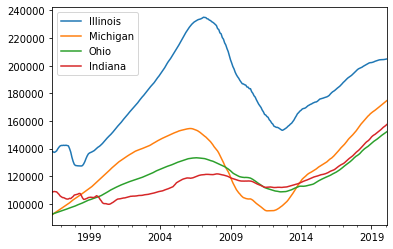

In [37]:
df_state_price.Illinois.plot()
df_state_price.Michigan.plot()
df_state_price.Ohio.plot()
df_state_price.Indiana.plot()
# plt.xticks(range(1996,2020))
plt.legend()

## Comparing housing value changes with other possible factors

### Population 
The population of Indiana counties were found [here](http://www.stats.indiana.edu/population/popTotals/2019_cntyest.asp).

In [95]:
df_populationIN = pd.read_excel('2019_cntyest.xlsx')
#df_populationIN = pd.read_excel('2019_cntyest.xlsx',encoding='latin-1')

In [96]:
df_populationIN

,Geographic Area,Fips Code,Population Estimates\n (as of July 1),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,"April 1, 2010",Unnamed: 13,"Change\n July 1, 2010\n to July 1, 2019",Unnamed: 15,"Rank: Pop Change\n July 1, 2010\n to July 1, 2019",Unnamed: 17,"Change\n July 1, 2018 to July 1, 2019",Unnamed: 19,"Rank: Pop Change\nJuly 1, 2018\n to July 1, 2019",Unnamed: 21
0,NaN,NaN,2019,2018,2017,2016,2015,2014,2013,2012,...,Census,Rank,Number,Percent,Number,Percent,Number,Percent,Number,Percent
1,Indiana,18000.0,6732219,6695497,6658078,6634304,6608422,6593644,6568713,6537703,...,6483802,NaN,241787,0.0372528,NaN,NaN,36722,0.00548458,NaN,NaN
2,Adams County,18001.0,35777,35595,35385,35178,34945,34758,34644,34400,...,34387,45,1333,0.0387005,23,17,182,0.00511308,30,23
3,Allen County,18003.0,379299,375079,371723,369412,367362,365147,363355,360890,...,355329,3,23354,0.0656113,4,12,4220,0.011251,3,7
4,Bartholomew County,18005.0,83779,82722,82213,82231,81458,80497,79655,79001,...,76794,20,6961,0.0906168,12,7,1057,0.0127777,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Washington County,18175.0,28036,27932,27771,27728,27774,27886,27779,27913,...,28262,57,-256,-0.00904849,49,44,104,0.00372333,34,31
90,Wayne County,18177.0,65884,66046,66179,66630,66972,67378,67785,68224,...,68917,24,-3005,-0.0436209,89,81,-162,-0.00245284,84,71
91,Wells County,18179.0,28296,28083,27958,27865,27851,27814,27715,27707,...,27636,58,614,0.0221805,28,24,213,0.00758466,25,15
92,White County,18181.0,24102,24133,24163,24074,24274,24433,24401,24466,...,24643,63,-581,-0.0235385,59,64,-31,-0.00128455,65,64


In [97]:
df_populationIN.columns = df_populationIN.iloc[0].values

In [98]:
df_populationIN.head()

,NaN,NaN,2019,2018,2017,2016,2015,2014,2013,2012,...,Census,Rank,Number,Percent,Number,Percent,Number,Percent,Number,Percent
0,NaN,NaN,2019,2018,2017,2016,2015,2014,2013,2012,...,Census,Rank,Number,Percent,Number,Percent,Number,Percent,Number,Percent
1,Indiana,18000.0,6732219,6695497,6658078,6634304,6608422,6593644,6568713,6537703,...,6483802,NaN,241787,0.0372528,NaN,NaN,36722,0.00548458,NaN,NaN
2,Adams County,18001.0,35777,35595,35385,35178,34945,34758,34644,34400,...,34387,45,1333,0.0387005,23,17,182,0.00511308,30,23
3,Allen County,18003.0,379299,375079,371723,369412,367362,365147,363355,360890,...,355329,3,23354,0.0656113,4,12,4220,0.011251,3,7
4,Bartholomew County,18005.0,83779,82722,82213,82231,81458,80497,79655,79001,...,76794,20,6961,0.0906168,12,7,1057,0.0127777,9,6


In [99]:
columns = list(df_populationIN.columns)
columns[0:2]= ['Geographic_Area','FipsCode']

In [100]:
df_populationIN.columns= columns

In [101]:
df_populationIN.drop([0], inplace= True)

In [102]:
df_populationIN.head()

,Geographic_Area,FipsCode,2019,2018,2017,2016,2015,2014,2013,2012,...,Census,Rank,Number,Percent,Number,Percent,Number,Percent,Number,Percent
1,Indiana,18000.0,6732219,6695497,6658078,6634304,6608422,6593644,6568713,6537703,...,6483802,NaN,241787,0.0372528,NaN,NaN,36722,0.00548458,NaN,NaN
2,Adams County,18001.0,35777,35595,35385,35178,34945,34758,34644,34400,...,34387,45,1333,0.0387005,23,17,182,0.00511308,30,23
3,Allen County,18003.0,379299,375079,371723,369412,367362,365147,363355,360890,...,355329,3,23354,0.0656113,4,12,4220,0.011251,3,7
4,Bartholomew County,18005.0,83779,82722,82213,82231,81458,80497,79655,79001,...,76794,20,6961,0.0906168,12,7,1057,0.0127777,9,6
5,Benton County,18007.0,8748,8653,8631,8658,8693,8720,8748,8821,...,8854,89,-115,-0.0129753,40,50,95,0.0109789,36,8


In [103]:
df_populationIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 22 columns):
Geographic_Area    93 non-null object
FipsCode           93 non-null float64
2019               93 non-null int64
2018               93 non-null int64
2017               93 non-null int64
2016               93 non-null int64
2015               93 non-null int64
2014               93 non-null int64
2013               93 non-null int64
2012               93 non-null int64
2011               93 non-null int64
2010               93 non-null int64
Census             93 non-null object
Rank               92 non-null object
Number             93 non-null object
Percent            93 non-null object
Number             92 non-null object
Percent            92 non-null object
Number             93 non-null object
Percent            93 non-null object
Number             92 non-null object
Percent            92 non-null object
dtypes: float64(1), int64(10), object(11)
memory usage: 16.7+ KB


In [104]:
a= ['Geographic_Area']
for i in range(2019,2009,-1): 
    a.append(i)

In [105]:
a

['Geographic_Area', 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

In [106]:
Indiana_pop = df_populationIN[a]

In [107]:
Indiana_pop = Indiana_pop.T
Indiana_pop.columns = Indiana_pop.iloc[0]

In [108]:
Indiana_pop.drop(Indiana_pop.index[0],inplace= True)

In [109]:
Indiana_pop.index = pd.to_datetime(Indiana_pop.index,format='%Y' )

In [110]:
Indiana_pop

Geographic_Area,Indiana,Adams County,Allen County,Bartholomew County,Benton County,Blackford County,Boone County,Brown County,Carroll County,Cass County,...,Vermillion County,Vigo County,Wabash County,Warren County,Warrick County,Washington County,Wayne County,Wells County,White County,Whitley County
2019-01-01,6732219,35777,379299,83779,8748,11758,67843,15092,20257,37689,...,15498,107038,30996,8265,62998,28036,65884,28296,24102,33964
2018-01-01,6695497,35595,375079,82722,8653,11924,66930,15230,20188,37895,...,15510,107367,31198,8280,62474,27932,66046,28083,24133,34047
2017-01-01,6658078,35385,371723,82213,8631,12028,65723,15010,20067,37828,...,15503,107569,31380,8204,62401,27771,66179,27958,24163,33722
2016-01-01,6634304,35178,369412,82231,8658,12115,64192,14996,19973,37905,...,15593,107790,31513,8165,62005,27728,66630,27865,24074,33475
2015-01-01,6608422,34945,367362,81458,8693,12242,63033,14994,19887,38081,...,15593,107533,31860,8270,61522,27774,66972,27851,24274,33444
2014-01-01,6593644,34758,365147,80497,8720,12347,61631,14944,19953,38487,...,15659,107920,32100,8339,60956,27886,67378,27814,24433,33444
2013-01-01,6568713,34644,363355,79655,8748,12461,60346,15055,20113,38585,...,15852,108200,32269,8369,60852,27779,67785,27715,24401,33283
2012-01-01,6537703,34400,360890,79001,8821,12528,59033,15049,20112,38771,...,15923,108523,32386,8392,60347,27913,68224,27707,24466,33335
2011-01-01,6516528,34368,358974,77620,8856,12656,57915,15076,20043,38916,...,16072,108330,32567,8470,60201,28196,68636,27738,24592,33358
2010-01-01,6490432,34444,355945,76818,8863,12771,56916,15207,20199,38985,...,16116,107888,32848,8521,59839,28292,68889,27682,24683,33353


In [111]:
Indiana_pop.columns[3]

'Bartholomew County'

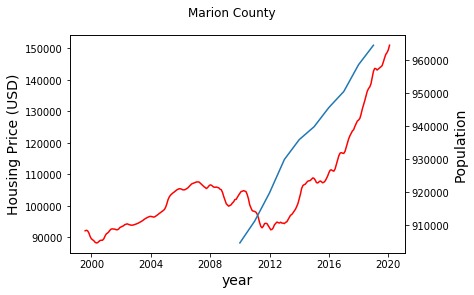

In [117]:
fig, ax = plt.subplots()
ax.plot(df_county_available.loc['Marion County'], color="r")
ax.set_xlabel("year", fontsize = 14)
ax.set_ylabel("Housing Price (USD)", fontsize = 14)
# df_county_available.loc['Hamilton County'].plot()
ax2 = ax.twinx()
ax2.plot(Indiana_pop['Marion County'])
ax2.set_ylabel("Population", fontsize = 14)
plt.suptitle('Marion County')
plt.show()
# county = pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]

# plt.title(county +', '+ str(46227) + ', housing price trend')

### GDP by County
https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas

In [119]:
df_GDP_US = pd.read_excel('lagdp1219.xlsx')

In [120]:
df_GDP_US.head()

,"Table 1. Real Gross Domestic Product by County, 2015 - 2018",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Real Gross Domestic Product,NaN,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN,NaN
1,NaN,Thousands of chained (2012) dollars,NaN,NaN,NaN,Rank in State,Percent change,NaN,NaN,Rank in State
2,NaN,2015,2.016000e+03,2.017000e+03,2.018000e+03,2018,2016,2017.0,2018.0,2018
3,United States,17403843000,1.768889e+10,1.810808e+10,1.863816e+10,--,1.6,2.4,2.9,--
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<img src = "lagdp1219_head.png">